# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json as json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=AUD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url) 
btc_response_data = btc_response_data.json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_response_data = eth_response_data.json()

# Compute current value of my crpto


my_btc_value = my_btc * btc_response_data['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_response_data['data']['1027']['quotes']['USD']['price']
total_crypto_value = my_btc_value + my_eth_value


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75772.80
The current value of your 5.3 ETH is $24510.75


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
# Format current date as ISO format
current_date = pd.Timestamp(pd.to_datetime("2015-08-07"), tz="Australia/NSW").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_portfolio[ticker]["close"]

# Drop the time component of the date
#df_closing_prices.index = df_closing_prices.index.date



# Preview DataFrame
df_closing_prices.head()

AGG     SPY
time                                     
2015-08-06 00:00:00-04:00  108.99  208.47

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_closing_prices['AGG'].values[0]
spy_close_price = df_closing_prices['SPY'].values[0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.99
Current SPY closing price: $208.47


In [14]:
# Compute the current value of share
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
total_share_value = my_agg_value + my_spy_value



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $10423.5
The current value of your 200 AGG shares is $21798.0


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000
print()
# Create savings DataFrame
df_savings = pd.DataFrame({"amount":[total_crypto_value,total_share_value]},
                         index = ["crypto","shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  100283.551
shares   32221.500

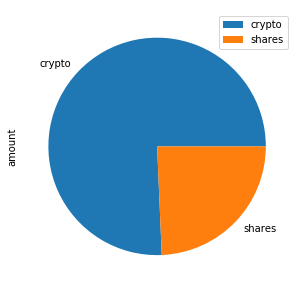

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(5, 5))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().values[0]

# Validate saving health
if(total_savings > emergency_fund):
    print("Congratulations, You have enough funds to cover you in an emergency")
elif(total_savings < emergency_fund):
    funds_required = emergency_fund - total_savings
    print(f"Unfortunately, you need additional ${funds_required} required to cover you in an emergenct")
elif(total_savings == emergency_fund):
    print("Congratulations on reaching your emergency fund financial goal")


Congratulations, You have enough funds to cover you in an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
print(tickers)

['AGG', 'SPY']


In [31]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Create and empty DataFrame for closing prices
df_stock_data = pd.DataFrame()

# Fetch the closing prices for all the tickers
#for ticker in tickers:
#    df_stock_data[ticker] = df_portfolio[ticker]["close"]
    
df_stock_data = df_portfolio

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY            \
              open      high       low   close    volume    open      high   
2020-03-18  109.36  110.5700  105.7707  106.33  30173684  236.25  248.3700   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320  239.25  247.3800   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412  242.53  244.4700   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510  228.19  229.6833   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498  234.42  244.1000   

                                       
               low   close     volume  
2020-03-18  228.02  241.01  256921808  
2020-03-19  232.22  241.18  248430643  
2020-03-20  228.50  228.94  286308782  
2020-03-23  218.26  222.51  268298876  
2020-03-24  233.80  243.59  203576470

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500
MC_AAPL = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0             1             2             3             4    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     9.826683e-01  1.018156e+00  9.985812e-01  9.936505e-01  1.009436e+00   
2     9.998029e-01  1.042787e+00  9.952134e-01  9.825495e-01  1.018803e+00   
3     9.981471e-01  1.050218e+00  9.848487e-01  9.659998e-01  1.029278e+00   
4     9.942439e-01  1.045248e+00  9.793810e-01  9.729759e-01  1.044251e+00   
...            ...           ...           ...           ...           ...   
7556  7.421323e+07  6.316364e+06  2.904506e+07  1.256481e+08  4.055871e+07   
7557  7.424702e+07  6.409831e+06  2.904000e+07  1.267424e+08  4.091108e+07   
7558  7.601678e+07  6.445841e+06  2.905383e+07  1.257638e+08  4.101176e+07   
7559  7.621838e+07  6.463983e+06  2.902177e+07  1.250879e+08  4.065933e+07   
7560  7.669936e+07  6.481434e+06  2.930888e+07  1.279448e+08  4.042702e+07   

               5             6             7             8             9    \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.007968e+00  9.914150e-01  9.882949e-01  1.008200e+00  9.918620e-01   
2     9.998120e-01  9.844771e-01  9.813498e-01  9.913440e-01  9.907987e-01   
3     9.773771e-01  9.892476e-01  9.823149e-01  9.833441e-01  9.962704e-01   
4     9.543155e-01  9.774706e-01  9.791078e-01  9.987962e-01  1.012119e+00   
...            ...           ...           ...           ...           ...   
7556  8.395966e+06  7.203100e+07  5.764924e+06  1.088399e+07  9.448876e+07   
7557  8.310981e+06  7.229988e+07  5.960863e+06  1.088241e+07  9.487929e+07   
7558  8.375488e+06  7.140148e+07  6.013352e+06  1.091842e+07  9.462985e+07   
7559  8.502707e+06  7.088205e+07  6.036332e+06  1.095874e+07  9.310421e+07   
7560  8.434570e+06  6.928163e+07  6.117024e+06  1.100269e+07  9.395766e+07   

      ...           490           491           492           493  \
0     ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     ...  9.960100e-01  9.899555e-01  9.964049e-01  1.013098e+00   
2     ...  9.913212e-01  9.955894e-01  1.027991e+00  1.008665e+00   
3     ...  9.719949e-01  9.846235e-01  1.016500e+00  1.010505e+00   
4     ...  9.894851e-01  9.847148e-01  1.018300e+00  1.015312e+00   
...   ...           ...           ...           ...           ...   
7556  ...  2.210389e+07  4.800564e+07  7.319250e+06  2.291679e+07   
7557  ...  2.206189e+07  4.766120e+07  7.450559e+06  2.315893e+07   
7558  ...  2.205908e+07  4.764228e+07  7.506162e+06  2.328144e+07   
7559  ...  2.255926e+07  4.693441e+07  7.577158e+06  2.337292e+07   
7560  ...  2.274571e+07  4.755907e+07  7.640044e+06  2.356215e+07   

               494           495           496           497           498  \
0     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
1     1.005982e+00  9.895170e-01  1.030461e+00  1.019507e+00  9.873658e-01   
2     1.012383e+00  9.978595e-01  1.029618e+00  1.027860e+00  9.866722e-01   
3     1.010385e+00  9.738725e-01  1.036311e+00  1.036746e+00  1.017146e+00   
4     1.025097e+00  9.786621e-01  1.043096e+00  1.049208e+00  1.016217e+00   
...            ...           ...           ...           ...           ...   
7556  3.305511e+07  2.200721e+07  2.255591e+07  4.778459e+07  1.681903e+07   
7557  3.412379e+07  2.196924e+07  2.288301e+07  4.887012e+07  1.654695e+07   
7558  3.406929e+07  2.195450e+07  2.299331e+07  4.893722e+07  1.664796e+07   
7559  3.468780e+07  2.258281e+07  2.319915e+07  4.948248e+07  1.675398e+07   
7560  3.491712e+07  2.258193e+07  2.323107e+07  4.854746e+07  1.690571e+07   

               499  
0     1.000000e+00  
1     1.014350e+00  
2     1.014638e+00  
3     1.003333e+00  
4     9.775781e-01  
...            ...  
7556  7.211136e+07  
7557  7.336392e+07  
7558  7.362742e+07  
7559  7.422347e+07  
7560  7.476240e+07  

[7561 rows x 500 columns]

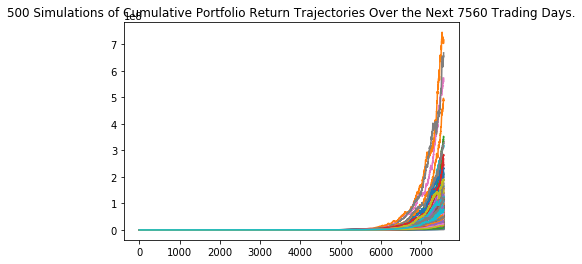

In [34]:
# Plot simulation outcomes
line_plot = MC_AAPL.plot_simulation()

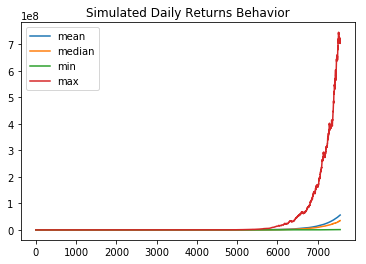

In [36]:
# Plot probability distribution and confidence intervals
simulated_returns_data = {
    "mean": list(MC_AAPL.simulated_return.mean(axis=1)),
    "median": list(MC_AAPL.simulated_return.median(axis=1)),
    "min": list(MC_AAPL.simulated_return.min(axis=1)),
    "max": list(MC_AAPL.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()
df_simulated_returns.plot(title="Simulated Daily Returns Behavior")

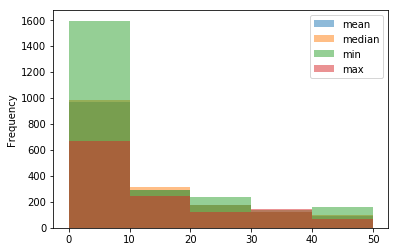

In [42]:
df_simulated_returns.plot.hist(alpha=0.5,bins=[0,10,20,30,40,50]) 

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            5.622674e+07
std             7.290416e+07
min             1.201925e+06
25%             1.821527e+07
50%             3.509311e+07
75%             6.763324e+07
max             7.165163e+08
95% CI Lower    5.874474e+06
95% CI Upper    2.320194e+08
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58744738781.26 and $2320193538622.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [39]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $58744738781.26 and $2320193538622.0
